**DATA LOADING AND ENVIRONMENTAL SETUP**

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    # Convert Google Drive share links to direct download links
    sentiment_data_url = 'https://drive.google.com/uc?export=download&id=1YFJBpI-MjUjJs_40NqiWeV6GJuyvxfO9'
    trader_data_url = 'https://drive.google.com/uc?export=download&id=12QkZTvXDKhfi-85NesbJWL8sZkbCg4Se'

    sentiment_data = pd.read_csv(sentiment_data_url)
    trader_data = pd.read_csv(trader_data_url)

    print("Files loaded successfully!")
except Exception as e:
    print(f"Error loading files: {e}")

Files loaded successfully!


**DATA CLEANING AND MERGING**

In [18]:
# 1. Standardize the Sentiment Dates
sentiment_data['date'] = pd.to_datetime(sentiment_data['date'])

# 2. Standardize the Trader Data Dates
trader_data['date'] = pd.to_datetime(trader_data['Timestamp'], unit='ms').dt.normalize()

# 3. Perform the Merge (Inner Join)
# This adds the 'Classification' column from sentiment to every trade row.
df = pd.merge(trader_data, sentiment_data, on='date', how='inner')

print(f"Merge Complete! Total transactions with sentiment data: {len(df)}")
df.head()

Merge Complete! Total transactions with sentiment data: 184263


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27,1730007000,74,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27,1730007000,74,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27,1730007000,74,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27,1730007000,74,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27,1730007000,74,Greed


**DATA VISUALISATIONS**

Average Profit/Loss by Market Sentiment:
classification
Extreme Greed    25.418772
Fear             50.047622
Greed            87.894859
Neutral          22.229713
Name: Closed PnL, dtype: float64


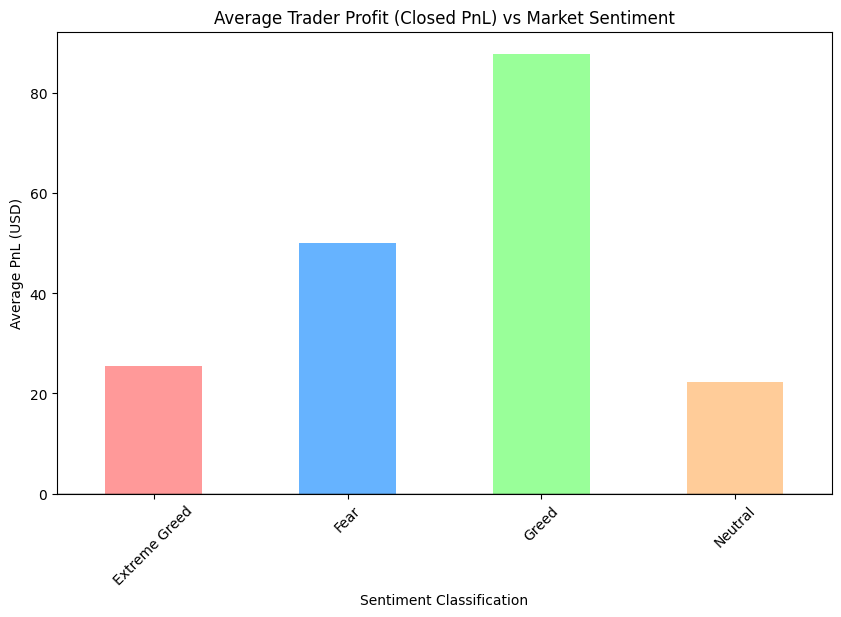

In [21]:
# 1. Group by classification and calculate average Profit
pnl_analysis = df.groupby('classification')['Closed PnL'].mean()

print("Average Profit/Loss by Market Sentiment:")
print(pnl_analysis)

# 2. Visualize the results
plt.figure(figsize=(10, 6))
pnl_analysis.plot(kind='bar', color=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.axhline(0, color='black', linewidth=1) # Adds a line at 0 for profit/loss reference
plt.title('Average Trader Profit (Closed PnL) vs Market Sentiment')
plt.ylabel('Average PnL (USD)')
plt.xlabel('Sentiment Classification')
plt.xticks(rotation=45)
plt.savefig('pnl_vs_sentiment chart.png')
plt.show()


Average Trade Size by Market Sentiment:
classification
Extreme Greed    5660.265764
Fear             5259.977837
Greed            3182.883845
Neutral          3058.848110
Name: Size USD, dtype: float64


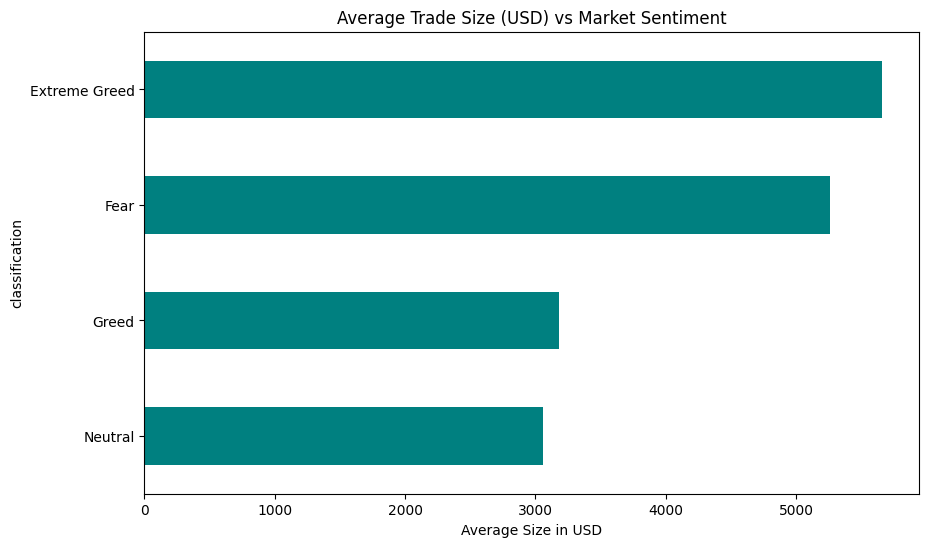

In [22]:
# Group by classification and calculate average Trade Size
size_analysis = df.groupby('classification')['Size USD'].mean()

print("\nAverage Trade Size by Market Sentiment:")
print(size_analysis)

# Visualize
plt.figure(figsize=(10, 6))
size_analysis.sort_values().plot(kind='barh', color='teal')
plt.title('Average Trade Size (USD) vs Market Sentiment')
plt.xlabel('Average Size in USD')
plt.savefig('trade_size_vs_sentiment chart.png')
plt.show()

Number of Trades per Sentiment:
classification
Fear             133871
Greed             36289
Neutral            7141
Extreme Greed      6962
Name: count, dtype: int64


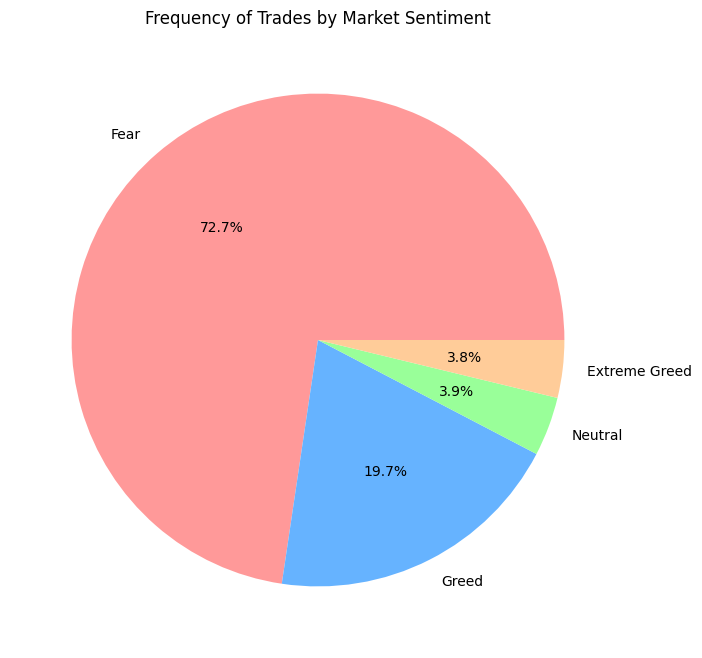

In [23]:
# Count how many trades happen in each sentiment category
trade_counts = df['classification'].value_counts()

print("Number of Trades per Sentiment:")
print(trade_counts)

# Save this as a pie chart
plt.figure(figsize=(8, 8))
trade_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Frequency of Trades by Market Sentiment')
plt.ylabel('')
plt.savefig('trade_frequency_pie.png') # Saves to your Colab files
plt.show()


**DATA EXPORT**

In [19]:

df.to_csv('processed_trader_data.csv', index=False)

print("File 'processed_trader_data.csv' has been created!")

File 'processed_trader_data.csv' has been created!


In [20]:
# Save only the first 1000 rows as a sample
df.head(1000).to_csv('processed_trader_data_sample.csv', index=False)